# Importing python's libraries

In [1]:
!pip install pandas
!pip install xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd

In [3]:
import sqlite3

In [4]:
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import matplotlib as mpl
import matplotlib.gridspec as gridspec 

In [5]:
import numpy as np

# SQL Tasks
I decided to chose python to complete this test. 


In [6]:
client_accounts_df = pd.read_excel('TestBI.xlsx', sheet_name='Client_Accounts')
financial_transactions_df = pd.read_excel('TestBI.xlsx', sheet_name='Financial_transactions')
agents_df = pd.read_excel('TestBI.xlsx', sheet_name='Agents')


conn = sqlite3.connect(':memory:')
client_accounts_df.to_sql('Client_Accounts', conn, if_exists='replace', index=True)
financial_transactions_df.to_sql('Financial_transactions', conn, if_exists='replace', index=True)
agents_df.to_sql('Agents', conn, if_exists='replace', index=True)

In [7]:
# 1. Produce a list of transactions with the Account No of the client and the Name of the Agent that owns the transaction
query1 = '''
SELECT ft.vtigeraccountid, ca.account_no, ag.Name
FROM Financial_transactions ft
JOIN Client_Accounts ca ON ft.vtigeraccountid = ca.accountid
JOIN Agents ag ON ca.assigned_to = ag.Id
'''
result1 = pd.read_sql_query(query1, conn)
print("Result of query 1:\n", result1)

Result of query 1:
       vtigeraccountid   account_no              Name
0            15234947  ACC11255533    Alberto Sylvie
1            15234947  ACC11255533    Alberto Sylvie
2            15191356  ACC11253099         Ruth Aron
3            14803587  ACC11228524         Ruth Aron
4            14803587  ACC11228524         Ruth Aron
...               ...          ...               ...
9062         14749855  ACC11225431         Ruth Aron
9063         14568430  ACC11208743     Zachary Kelly
9064         12533276  ACC11113094  Lawrence Frances
9065         14568430  ACC11208743     Zachary Kelly
9066         15030492  ACC11244563     Zachary Kelly

[9067 rows x 3 columns]


In [8]:
result1.head(5)

,vtigeraccountid,account_no,Name
0,15234947,ACC11255533,Alberto Sylvie
1,15234947,ACC11255533,Alberto Sylvie
2,15191356,ACC11253099,Ruth Aron
3,14803587,ACC11228524,Ruth Aron
4,14803587,ACC11228524,Ruth Aron


In [9]:
# 2. Find 10 Client with the largest Net deposit (Net Deposit = Deposit - Withdrawal). Display their Account No.
query2 = """
SELECT 
    ca.account_no, 
    SUM(CASE 
            WHEN ft.Transaction_type_name = 'Deposit' THEN ft.usdamount 
            WHEN ft.Transaction_type_name = 'Withdrawal' THEN -ft.usdamount 
            ELSE 0 
        END) AS net_deposit
FROM 
    Financial_transactions ft 
    JOIN Client_Accounts ca ON ft.vtigeraccountid = ca.accountid
GROUP BY 
    ca.account_no 
ORDER BY 
    net_deposit DESC 
LIMIT 
    10
"""
result2 = pd.read_sql_query(query2, conn)
print("Result of query 2:\n", result2)

Result of query 2:
     account_no  net_deposit
0  ACC11030214  28722157.03
1  ACC11182102   1930700.00
2  ACC11169968    461243.56
3  ACC11175809    294500.00
4  ACC11045741    286293.20
5  ACC11189361    278762.34
6  ACC11066344    227893.68
7  ACC11240533    200000.00
8  ACC11060266    187481.40
9  ACC11198688    182741.66


In [10]:
result2.head(10)

,account_no,net_deposit
0,ACC11030214,28722157.03
1,ACC11182102,1930700.00
2,ACC11169968,461243.56
3,ACC11175809,294500.00
4,ACC11045741,286293.20
5,ACC11189361,278762.34
6,ACC11066344,227893.68
7,ACC11240533,200000.00
8,ACC11060266,187481.40
9,ACC11198688,182741.66


In [11]:
# 3. Rank the most frequent First Deposit Amount
query3 = """
SELECT ft.usdamount as first_deposit_amount, COUNT(*) as frequency
FROM Financial_transactions ft
WHERE ft.Transaction_type_name = 'Deposit' AND ft.ftd = 1
GROUP BY first_deposit_amount
ORDER BY frequency DESC
"""
result3 = pd.read_sql_query(query3, conn)
print("Result of query 3:\n", result3)

Result of query 3:
      first_deposit_amount  frequency
0                  250.00        460
1                  100.00        307
2                  150.00        101
3                  300.00         97
4                  500.00         82
..                    ...        ...
881                  6.71          1
882                  6.28          1
883                  2.70          1
884                  1.72          1
885                  1.25          1

[886 rows x 2 columns]


In [12]:
result3.head(10)

,first_deposit_amount,frequency
0,250.0,460
1,100.0,307
2,150.0,101
3,300.0,97
4,500.0,82
5,20.0,52
6,200.0,38
7,1000.0,33
8,123.0,28
9,50.0,15


In [13]:
# 4. Find 5 countries with the largest Client Value (Client Value = Net deposit/count of clients)
query4 = """
SELECT  
    ca.country,
    SUM(CASE 
            WHEN ft.Transaction_type_name = 'Deposit' THEN ft.usdamount 
            WHEN ft.Transaction_type_name = 'Withdrawal' THEN -ft.usdamount 
            ELSE 0 
        END) / COUNT(DISTINCT ca.accountid) AS  client_value
FROM 
    Financial_transactions ft 
    JOIN Client_Accounts ca ON ft.vtigeraccountid = ca.accountid 
WHERE 
    ft.Transaction_type_name IN ('Deposit', 'Withdrawal')
GROUP BY 
    ca.country 
ORDER BY 
    client_value DESC 
LIMIT 
    5
"""
result4 = pd.read_sql_query(query4, conn)
print("Result of query 4:\n", result4)

Result of query 4:
        country  client_value
0    Hong Kong  2.872216e+07
1     Paraguay  2.769911e+05
2  Philippines  1.930190e+04
3      Lebanon  1.505000e+04
4     Zimbabwe  7.374232e+03


In [14]:
result4.head()

,country,client_value
0,Hong Kong,2.872216e+07
1,Paraguay,2.769911e+05
2,Philippines,1.930190e+04
3,Lebanon,1.505000e+04
4,Zimbabwe,7.374232e+03


In [15]:
# 5. Find a last confirmed deposit and a withdrawal of each client: account_no, transaction_no, usdamount and created_time
query5 = '''
SELECT c.account_no, t1.transaction_no, t1.usdamount, t1.created_time
FROM Financial_transactions t1
INNER JOIN (
    SELECT MAX(created_time) as max_time, vtigeraccountid
    FROM Financial_transactions
    WHERE transactionapproval = 'Approved' AND Transaction_type_name = 'Deposit'
    GROUP BY vtigeraccountid
) t2 ON t1.created_time = t2.max_time AND t1.vtigeraccountid = t2.vtigeraccountid
INNER JOIN Client_Accounts c ON c.accountid = t1.vtigeraccountid
UNION
SELECT c.account_no, t1.transaction_no, t1.usdamount, t1.created_time
FROM Financial_transactions t1
INNER JOIN (
    SELECT MAX(created_time) as max_time, vtigeraccountid
    FROM Financial_transactions
    WHERE transactionapproval = 'Approved' AND Transaction_type_name = 'Withdrawal'
    GROUP BY vtigeraccountid
) t2 ON t1.created_time = t2.max_time AND t1.vtigeraccountid = t2.vtigeraccountid
INNER JOIN Client_Accounts c ON c.accountid = t1.vtigeraccountid;
'''
result5 = pd.read_sql_query(query5, conn)
print("Result of query 5:\n", result5)


Result of query 5:
        account_no transaction_no  usdamount         created_time
0     ACC10065991      MTT554002      18.58  2022-12-19 09:03:32
1     ACC10066553      MTT554300    1440.00  2022-12-20 04:32:57
2     ACC10066553      MTT554912    6898.20  2022-12-21 15:02:23
3     ACC10171322      MTT542766     135.42  2022-11-10 09:33:45
4     ACC10210384      MTT564857     100.00  2023-01-28 16:37:10
...           ...            ...        ...                  ...
3419  ACC11259735      MTT558202     500.00  2023-01-05 12:39:35
3420  ACC11259735      MTT560461     113.28  2023-01-13 12:19:00
3421  ACC11259778      MTT560665     150.00  2023-01-14 14:44:09
3422  ACC11259815      MTT558485    2000.00  2023-01-06 09:04:01
3423  ACC11259815      MTT559899    1612.80  2023-01-12 07:50:23

[3424 rows x 4 columns]


In [16]:
result5.head()

,account_no,transaction_no,usdamount,created_time
0,ACC10065991,MTT554002,18.58,2022-12-19 09:03:32
1,ACC10066553,MTT554300,1440.00,2022-12-20 04:32:57
2,ACC10066553,MTT554912,6898.20,2022-12-21 15:02:23
3,ACC10171322,MTT542766,135.42,2022-11-10 09:33:45
4,ACC10210384,MTT564857,100.00,2023-01-28 16:37:10


# Visualization Tasks


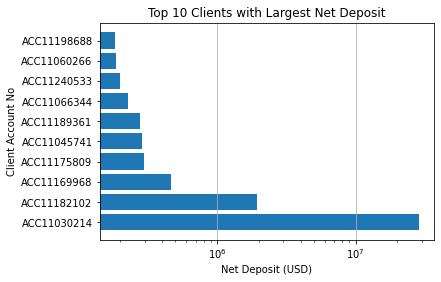

In [17]:
# 1. Dinamically vizualise financial activity of the Top 10 Clients from N2 of SQL task

# General visualisation

# Use the result2 dataframe obtained from the SQL query
plt.barh(result2['account_no'], result2['net_deposit'])
plt.xscale('log')
# Set chart title and axis labels
plt.title('Top 10 Clients with Largest Net Deposit')
plt.xlabel('Net Deposit (USD)')
plt.ylabel('Client Account No')

# Add grid lines
plt.grid(axis='x')

# Show the chart
plt.show()

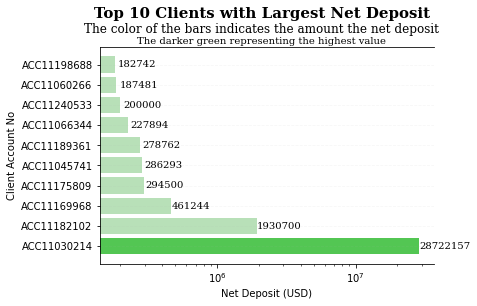

In [18]:
# Detailed visualisation

data = result2.sort_values(by='net_deposit', ascending=False)[:10]

# Create color map
color_map = ['#b8e0b8' if i < min(data['net_deposit']) + (max(data['net_deposit']) - min(data['net_deposit'])) / len(data) else '#53c653' for i in data['net_deposit']]

# Create horizontal bar chart
plt.barh(data['account_no'], data['net_deposit'], color=color_map)

# Set x-axis scale to log
plt.xscale('log')

# Set chart title and axis labels
plt.xlabel('Net Deposit (USD)')
plt.ylabel('Client Account No')

# Add value annotations
for i, v in enumerate(data['net_deposit']):
    plt.text(v + 10**4, i, f"{v:.0f}", color='black', va='center', fontweight='light', fontfamily='serif', ha='left')

# Add chart description
plt.figtext(0.5, 0.98, 'Top 10 Clients with Largest Net Deposit', fontsize=15, fontweight='bold', fontfamily='serif', ha='center')
#plt.figtext(0.5, 0.90, 'The color of the bars indicates the amount the net deposit (darker green representing the highest value)', fontsize=12, fontweight='light', fontfamily='serif', ha='center')
plt.figtext(0.5, 0.93, 'The color of the bars indicates the amount the net deposit', fontsize=12, fontweight='light', fontfamily='serif', ha='center')
plt.figtext(0.5, 0.89, 'The darker green representing the highest value', fontsize=10, fontweight='light', fontfamily='serif', ha='center')

plt.grid(axis='y', linestyle='--', alpha=0.1)

plt.gca().spines['right'].set_visible(False)

# Show the chart
plt.show()


In [19]:
# 2. Show 10 Agents with best performance. Explain the parameters you chose to identify Agent performance.

# SQL query for visualisation for last task
queryLast = '''
SELECT a.Name, SUM(ft.usdamount) as total_amount
FROM Agents a
INNER JOIN Client_Accounts ca ON a.id = ca.assigned_to
INNER JOIN Financial_transactions ft ON ca.accountid = ft.vtigeraccountid AND a.id = ft.original_deposit_owner
WHERE ft.transactionapproval = 'Approved' AND ft.Transaction_type_name = 'Deposit'
GROUP BY a.Name
ORDER BY total_amount DESC
LIMIT 10
'''
resultLast = pd.read_sql_query(queryLast, conn)
print("Result of query Last:\n", resultLast)

Result of query Last:
                Name  total_amount
0      Eugene Patel   23200388.51
1    Christian Cook     812652.62
2     Zachary Kelly     473528.36
3        Bruce Judy     264579.10
4     Austin Bailey     181137.40
5         Ruth Aron     111979.03
6    Jacob Kathleen      95175.76
7       Roy Theresa      73010.36
8    Alberto Sylvie      66207.24
9  Lawrence Frances      58631.07


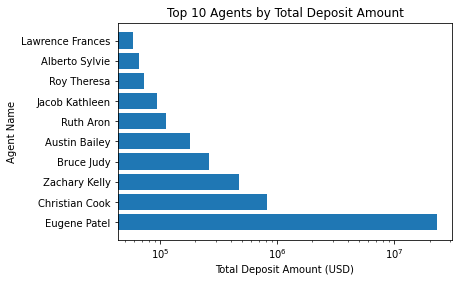

In [20]:
# General visualisation

# Use the result2 dataframe obtained from the SQL query
plt.barh(resultLast['Name'], resultLast['total_amount'])
plt.xscale('log')
# Set chart title and axis labels
plt.title('Top 10 Agents by Total Deposit Amount')
plt.xlabel('Total Deposit Amount (USD)')
plt.ylabel('Agent Name')

# Show the chart
plt.show()

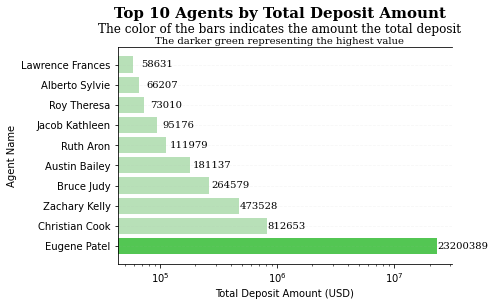

In [21]:
# Detailed visualisation

#Sort data by total amount and select top 10 agents

data = resultLast.sort_values(by='total_amount', ascending=False)[:10]

#Create color map

color_map = ['#b8e0b8' if i < min(data['total_amount']) + (max(data['total_amount']) - min(data['total_amount'])) / len(data) else '#53c653' for i in data['total_amount']]

#Create horizontal bar chart

plt.barh(data['Name'], data['total_amount'], color=color_map)

#Set x-axis scale to log

plt.xscale('log')

#Set chart title and axis labels

plt.xlabel('Total Deposit Amount (USD)')
plt.ylabel('Agent Name')

#Add value annotations

for i, v in enumerate(data['total_amount']):
  plt.text(v + 10**4, i, f"{v:.0f}", color='black', va='center', fontweight='light', fontfamily='serif', ha='left')

#Add chart description

plt.figtext(0.5, 0.98, 'Top 10 Agents by Total Deposit Amount', fontsize=15, fontweight='bold', fontfamily='serif', ha='center')
plt.figtext(0.5, 0.93, 'The color of the bars indicates the amount the total deposit', fontsize=12, fontweight='light', fontfamily='serif', ha='center')
plt.figtext(0.5, 0.89, 'The darker green representing the highest value', fontsize=10, fontweight='light', fontfamily='serif', ha='center')

plt.grid(axis='y', linestyle='--', alpha=0.1)

plt.gca().spines['right'].set_visible(False)

#Show the chart

plt.show()

To determine the performance of agents I used the amount of deposits that have been confirmed and credited to the accounts of clients assigned to agent. To do this, I combined all tables through their relationships and filter the "Deposit" transactions that have been confirmed. Then I summed up the funds associated with the agent and sorted them in a descending order to output the 10 agents with the highest amount of funds.

I created a bar chart that shows the 10 agents with the largest amount of deposits. The x-axis shows the amount of deposits, the y-axis shows the names of the agents. 

The chosen parameter to identify Agent performance is the total amount of USD currency deposited by the clients assigned to an agent. This parameter gives an idea about the agent's ability to attract and retain clients who deposit more funds into their accounts. The agents who are successful in bringing in more business through deposits are likely to have better performance compared to those who are not. Additionally, this parameter helps in measuring the revenue generated by an agent and can serve as a good indicator of their overall productivity and success.